# Song prediction EDA

## Importing the packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('data/train.csv')
df.head()

,id,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence,song_popularity
0,0,212990.0,0.642286,0.856520,0.707073,0.002001,10.0,NaN,-5.619088,0,0.082570,158.386236,4,0.734642,0
1,1,NaN,0.054866,0.733289,0.835545,0.000996,8.0,0.436428,-5.236965,1,0.127358,102.752988,3,0.711531,1
2,2,193213.0,NaN,0.188387,0.783524,-0.002694,5.0,0.170499,-4.951759,0,0.052282,178.685791,3,0.425536,0
3,3,249893.0,0.488660,0.585234,0.552685,0.000608,0.0,0.094805,-7.893694,0,0.035618,128.715630,3,0.453597,0
4,4,165969.0,0.493017,NaN,0.740982,0.002033,10.0,0.094891,-2.684095,0,0.050746,121.928157,4,0.741311,0


## About the data and featrues

### Song Attributes:

- **Song Duration:** Length of the track in milliseconds.

- **Acousticness:** A confidence measure from 0.0 to 1.0 of whether the track is acoustic. Typically, acoustic music is defined as music generated without any electronic amplification.

- **Danceability:** Describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.

- **Energy:** It indicates a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale.

- **Instrumentalness:** It indicates the absence of vocals in a track. Hence, songs made completely playing an instrument would have a value of 1 while rap songs without any background music would have a value close to 0. “Ooh” and “aah” sounds are treated as instrumental in this context.

- **Key:** It indicates the overall key of the track as an integer which can be mapped using standard Pitch Class notation.

- **Liveness:** It indicates the probability of the track being performed live in front of an audience.

- **Loudness:** It gives us the relative loudness of the track in decibels (dB) where the values vary between -60 and 0 dB.

- **Mode:** Indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.

- **Speechiness:** It is a measure of the presence of words (spoken/sung by humans) in a track. A piece of recording of a podcast or audio book would have almost 1.0 value while a song made with only playing instruments would have a value of 0.

- **Tempo:** The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.

- **Time Signature:** An estimated overall time signature of a track. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure).

- **Valence:** A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g., happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g., sad, depressed, angry).


## Exploratory Data Analysis

In [3]:
# Read the file again
df = pd.read_csv('data/train.csv')
df.head()

,id,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence,song_popularity
0,0,212990.0,0.642286,0.856520,0.707073,0.002001,10.0,NaN,-5.619088,0,0.082570,158.386236,4,0.734642,0
1,1,NaN,0.054866,0.733289,0.835545,0.000996,8.0,0.436428,-5.236965,1,0.127358,102.752988,3,0.711531,1
2,2,193213.0,NaN,0.188387,0.783524,-0.002694,5.0,0.170499,-4.951759,0,0.052282,178.685791,3,0.425536,0
3,3,249893.0,0.488660,0.585234,0.552685,0.000608,0.0,0.094805,-7.893694,0,0.035618,128.715630,3,0.453597,0
4,4,165969.0,0.493017,NaN,0.740982,0.002033,10.0,0.094891,-2.684095,0,0.050746,121.928157,4,0.741311,0


In [4]:
df.drop(["id"], axis=1, inplace=True)

In [5]:
# check the number of features in the dataset
columns = df.columns
len(columns)

14

In [6]:
#check the number of rows and columns
len(df)

40000

In [7]:
#checking the NaN values
df_null_data = df.isnull().sum()

In [8]:
df_null_data

song_duration_ms    4101
acousticness        3992
danceability        4026
energy              3975
instrumentalness    3985
key                 4065
liveness            4086
loudness            3957
audio_mode             0
speechiness            0
tempo                  0
time_signature         0
audio_valence          0
song_popularity        0
dtype: int64

In [9]:
df_null_data.index

Index(['song_duration_ms', 'acousticness', 'danceability', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'audio_mode',
       'speechiness', 'tempo', 'time_signature', 'audio_valence',
       'song_popularity'],
      dtype='object')

In [10]:
df_null_data["song_duration_ms"]

4101

In [11]:
[index for index in df_null_data.index if df_null_data[index]<=0]

['audio_mode',
 'speechiness',
 'tempo',
 'time_signature',
 'audio_valence',
 'song_popularity']

In [12]:
df_null_data.drop([index for index in df_null_data.index if df_null_data[index]==0], inplace=True)

<BarContainer object of 8 artists>

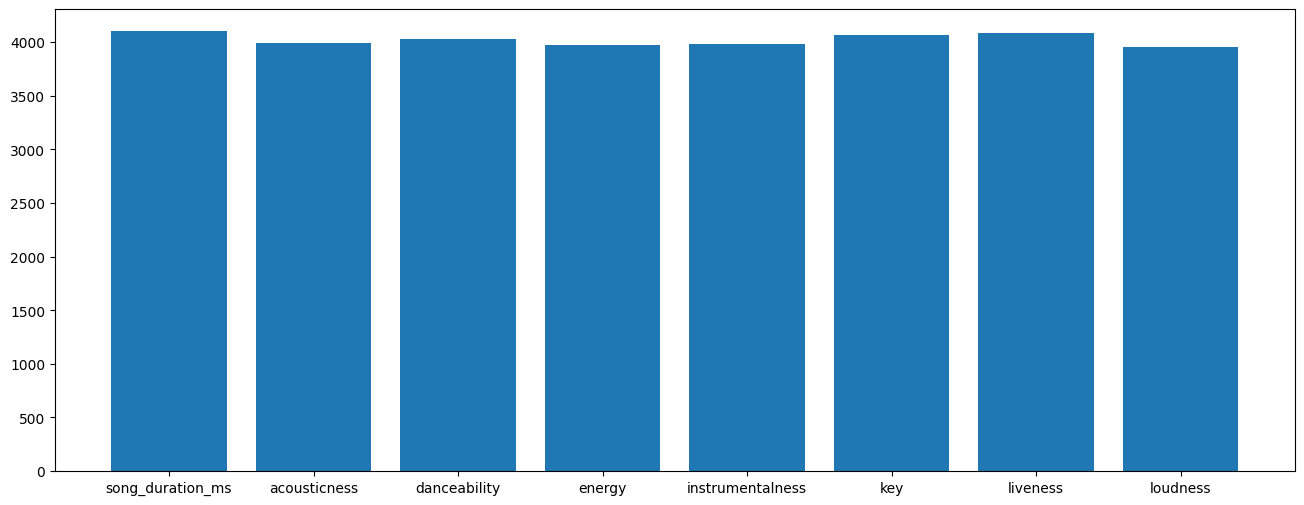

In [13]:
plt.figure(figsize=(16, 6))
plt.bar(x=df_null_data.index, height=df_null_data.values)

**Conclusions🧠**: From the above graph we come to know that almost all of the features having null values have same null values

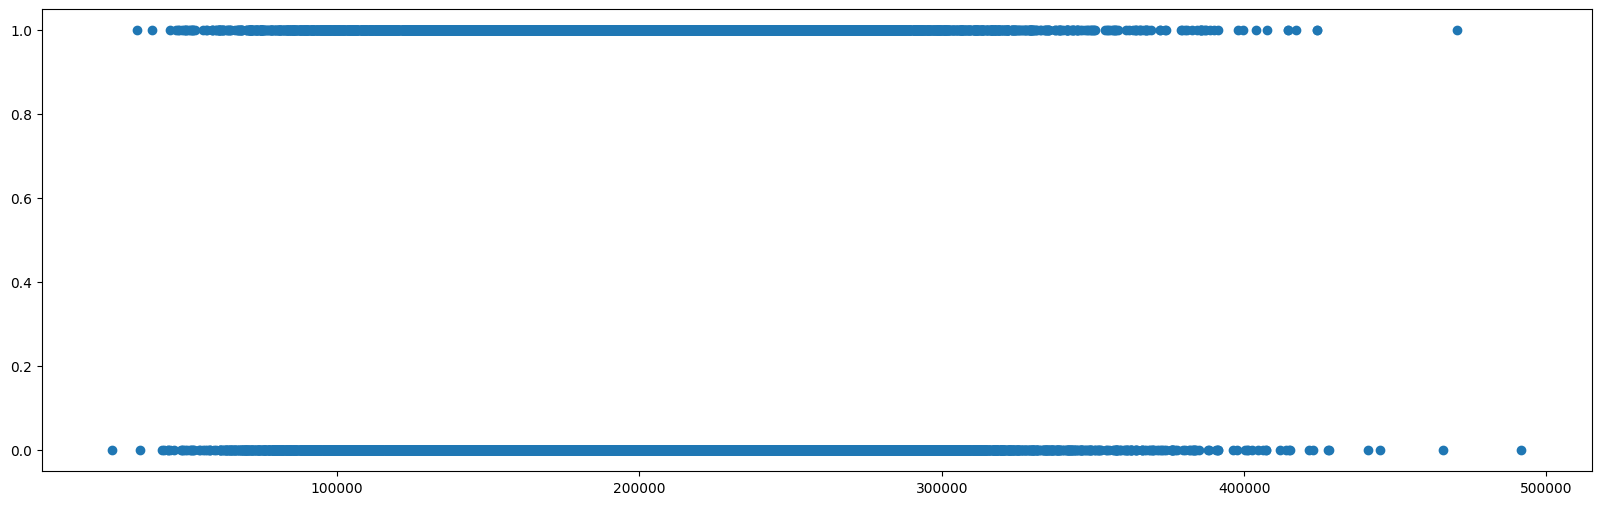

In [14]:
plt.figure(figsize=(20, 6))
plt.scatter(x=df["song_duration_ms"], y=df["song_popularity"])

Text(0, 0.5, 'density')

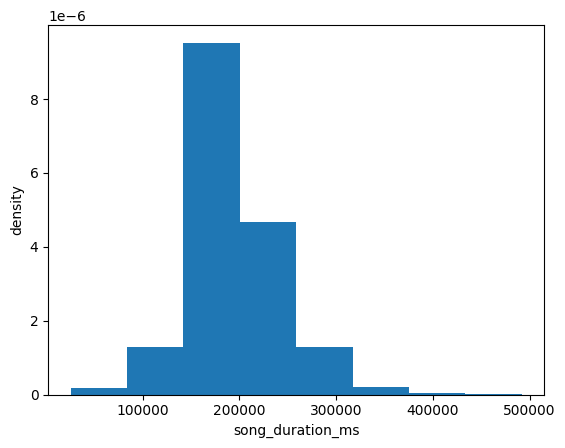

In [15]:
from scipy.stats import gaussian_kde
# data = df["song_duration_ms"]
# kde = gaussian_kde(data)
# x = np.linspace(min(data), max(data), 1000)
plt.hist(x=df["song_duration_ms"], bins=8, density=True)
# plt.plot(x, kde(x),color="red")
plt.xlabel("song_duration_ms")
plt.ylabel("density")



In [16]:
# import numpy as np
# import matplotlib.pyplot as plt
# from scipy.stats import gaussian_kde

# # Sample data
# data = df["song_duration_ms"]

# # Plot histogram
# plt.hist(data, bins=5, density=True, alpha=0.5, color='skyblue', edgecolor='black')

# # Smooth curve (KDE) over the histogram
# kde = gaussian_kde(data)
# x = np.linspace(min(data), max(data), 1000)
# plt.plot(x, kde(x), color='red')

# plt.title('Histogram with KDE')
# plt.xlabel('Value')
# plt.ylabel('Density')

# plt.show()


In [17]:
columns

Index(['song_duration_ms', 'acousticness', 'danceability', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'audio_mode',
       'speechiness', 'tempo', 'time_signature', 'audio_valence',
       'song_popularity'],
      dtype='object')

In [18]:
df[df["song_popularity"]==1]["song_duration_ms"]

1             NaN
7        196202.0
8        169660.0
10       128274.0
11       213121.0
           ...   
39988    205610.0
39990    161037.0
39993    147151.0
39994    158043.0
39997    160879.0
Name: song_duration_ms, Length: 14576, dtype: float64

Text(0, 0.5, 'density')

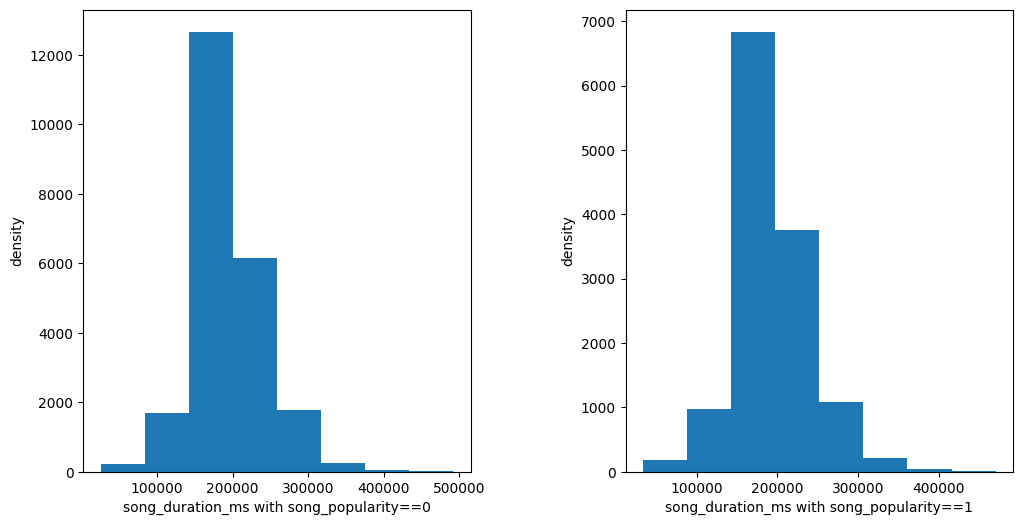

In [19]:
plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)
plt.hist(x=df[df["song_popularity"]==0]["song_duration_ms"], bins=8)
plt.xlabel("song_duration_ms with song_popularity==0")
plt.ylabel("density")
plt.subplots_adjust(wspace=0.4)
# plt.figure(figsize=(12,6))
plt.subplot(1, 2, 2)
plt.hist(x=df[df["song_popularity"]==1]["song_duration_ms"], bins=8)
plt.xlabel("song_duration_ms with song_popularity==1")
plt.ylabel("density")

**Conclusions🧠**
1. Both follow the same distributions (see the graph)
2. The maximum of song_popularity==0 is 12000 and song_popularity==1 is slightly lesser than 7000

In [20]:
df.head()

,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence,song_popularity
0,212990.0,0.642286,0.856520,0.707073,0.002001,10.0,NaN,-5.619088,0,0.082570,158.386236,4,0.734642,0
1,NaN,0.054866,0.733289,0.835545,0.000996,8.0,0.436428,-5.236965,1,0.127358,102.752988,3,0.711531,1
2,193213.0,NaN,0.188387,0.783524,-0.002694,5.0,0.170499,-4.951759,0,0.052282,178.685791,3,0.425536,0
3,249893.0,0.488660,0.585234,0.552685,0.000608,0.0,0.094805,-7.893694,0,0.035618,128.715630,3,0.453597,0
4,165969.0,0.493017,NaN,0.740982,0.002033,10.0,0.094891,-2.684095,0,0.050746,121.928157,4,0.741311,0


In [21]:
df.acousticness

0        0.642286
1        0.054866
2             NaN
3        0.488660
4        0.493017
           ...   
39995         NaN
39996    0.067488
39997    0.877431
39998         NaN
39999    0.007116
Name: acousticness, Length: 40000, dtype: float64

<Axes: ylabel='Frequency'>

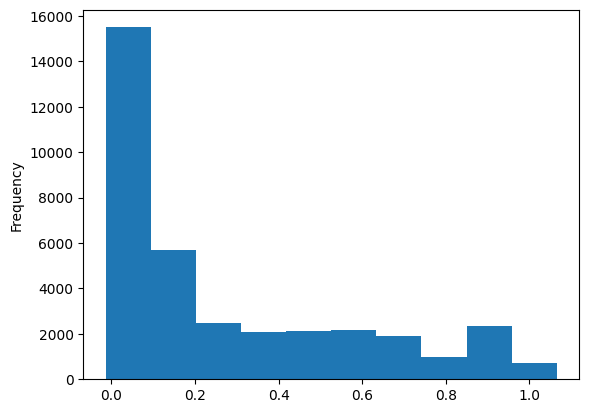

In [22]:
df.acousticness.plot.hist()

<Axes: ylabel='Frequency'>

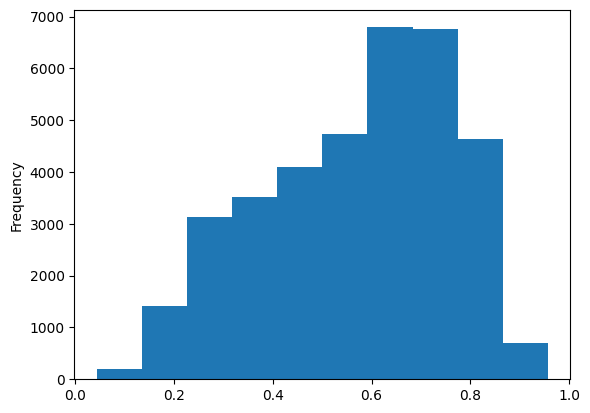

In [23]:
df.danceability.plot.hist()

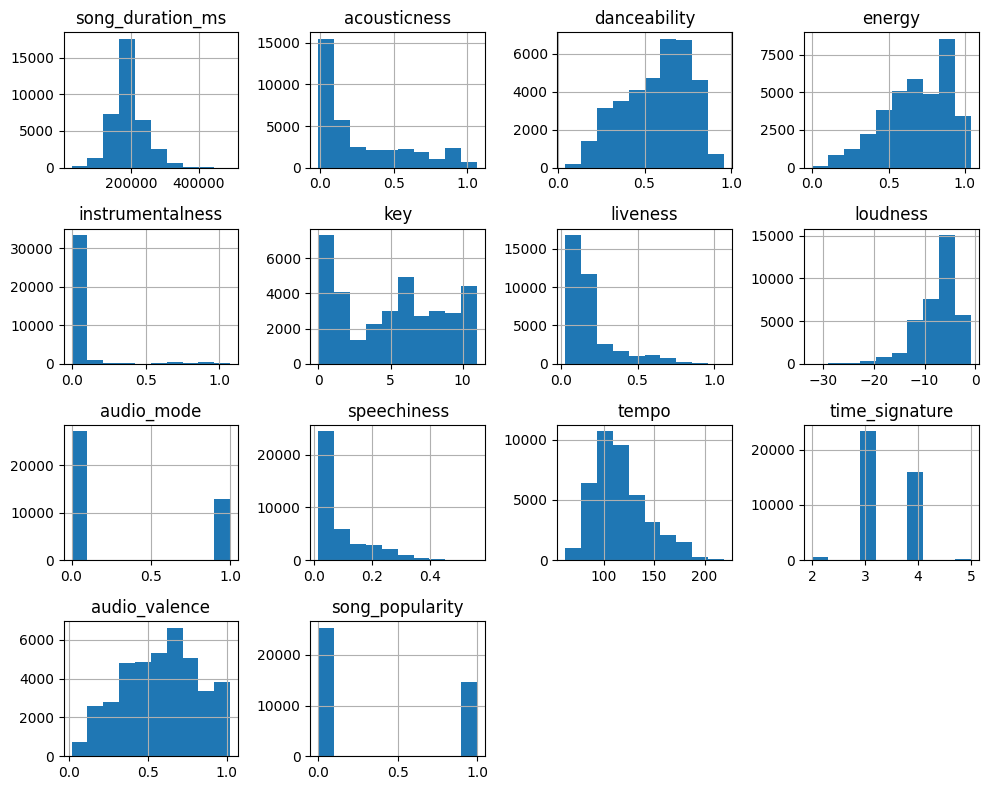

In [24]:
df.hist(figsize=(10, 8));
plt.tight_layout() 

In [25]:
non_catgorical_features = columns.drop(['audio_mode', 'time_signature', 'song_popularity', 'key'])
non_catgorical_features

Index(['song_duration_ms', 'acousticness', 'danceability', 'energy',
       'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo',
       'audio_valence'],
      dtype='object')

In [26]:
df['tempo'][:400]

0      158.386236
1      102.752988
2      178.685791
3      128.715630
4      121.928157
          ...    
395    122.420959
396     86.338982
397     95.396395
398    127.823797
399    118.173826
Name: tempo, Length: 400, dtype: float64

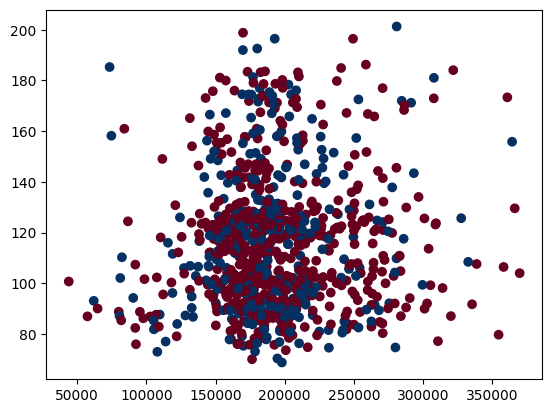

In [27]:
x = 1000
plt.scatter(x=df['song_duration_ms'][:x],
            y=df['tempo'][:x],
            c=df['song_popularity'][:x],
            cmap="RdBu")


In [28]:
## get the loudness
def drawTheGraph(row_name:str, col_name:str, plot_no:int,limit = 1000, c_name:str = "song_popularity"):
    plt.figure(figsize=(12, 10))
    plt.subplot(2, 5, plot_no)
    plt.scatter(x=df[row_name][:limit],
                y=df[col_name][:limit],
                c=df[c_name][:limit],
                cmap="RdBu")
    plt.title(f"getting the graph between {row_name} and {col_name}")
    plt.xlabel(f"{row_name}")
    plt.ylabel(f"{col_name}")
    plt.show();


In [29]:
non_catgorical_features.size

10

In [30]:
columns

Index(['song_duration_ms', 'acousticness', 'danceability', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'audio_mode',
       'speechiness', 'tempo', 'time_signature', 'audio_valence',
       'song_popularity'],
      dtype='object')

In [31]:
df.key.value_counts()

key
0.0     5175
6.0     4949
10.0    4302
2.0     4080
8.0     3028
5.0     2985
9.0     2881
7.0     2690
4.0     2239
1.0     2143
3.0     1346
11.0     117
Name: count, dtype: int64

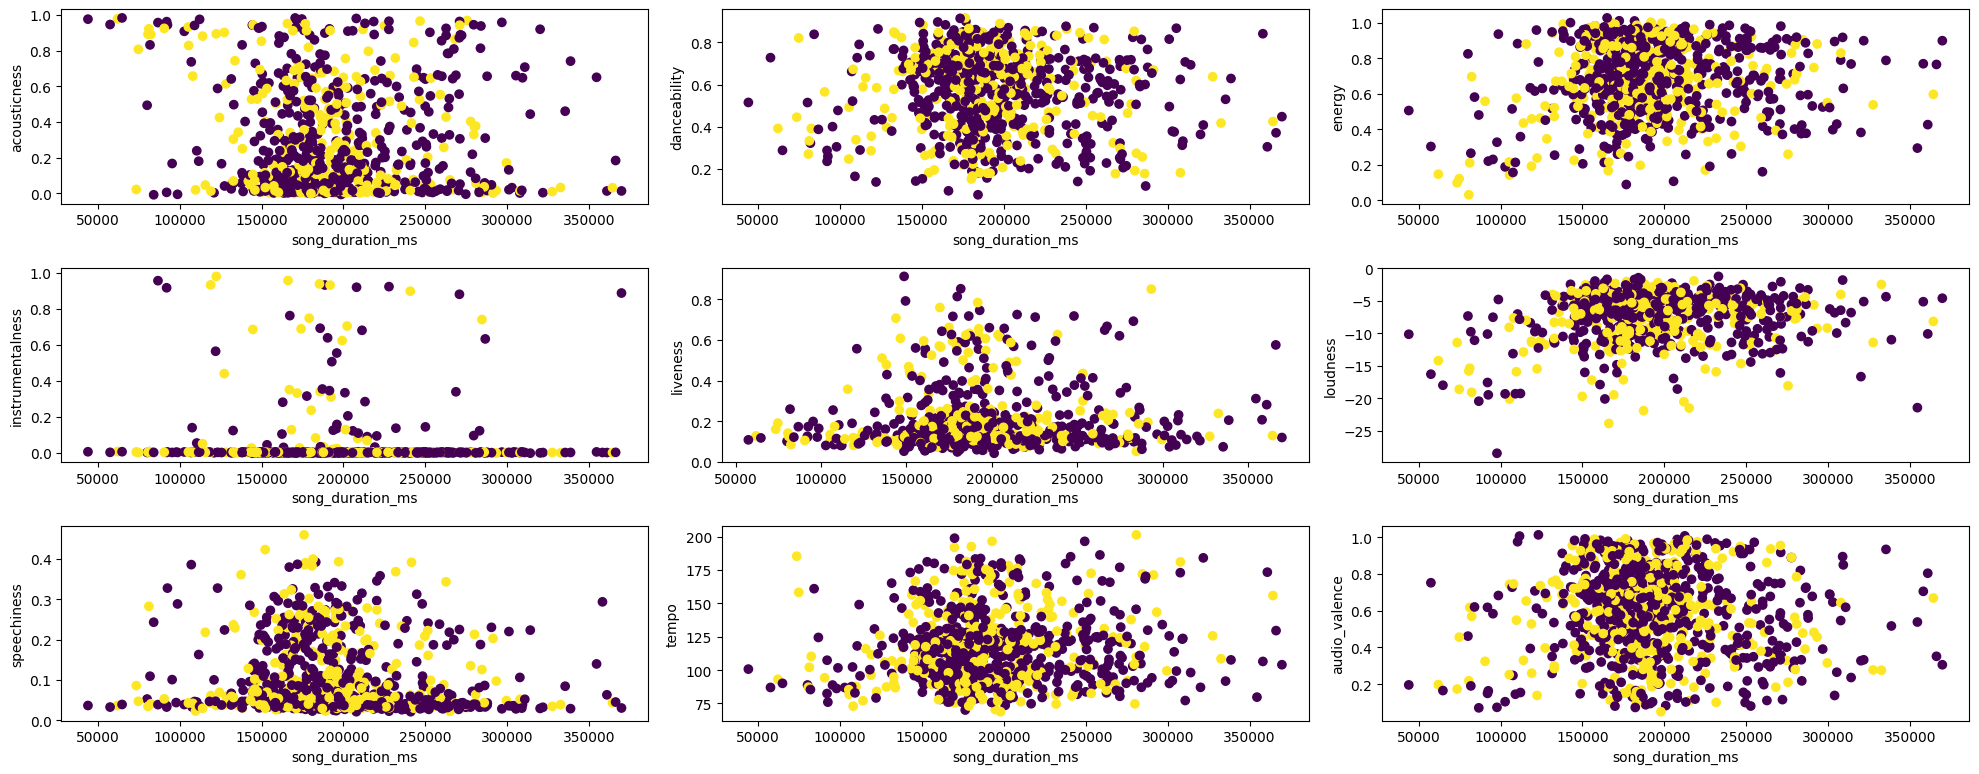

In [32]:

def get_relational_scatterplot(non_catgorical_features:list, x_feature:str, limit=1000, c_name="song_popularity"):
    plot_no = 1;
    plt.figure(figsize=(20, 10))
    for i in non_catgorical_features:
        if(i==x_feature):
            continue
        plt.subplot(4, 3, plot_no)
        plt.tight_layout()
        plt.scatter(x=df[x_feature][:limit],
                    y=df[i][:limit],
                    c=df[c_name][:limit],
                    cmap="viridis")
        # plt.title(f"getting the graph between {x_feature} and {i}")
        plt.xlabel(f"{x_feature}")
        plt.ylabel(f"{i}")
        plot_no+=1
    plt.show()
get_relational_scatterplot(non_catgorical_features=non_catgorical_features,
                          x_feature="song_duration_ms")      


In [33]:
columns

Index(['song_duration_ms', 'acousticness', 'danceability', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'audio_mode',
       'speechiness', 'tempo', 'time_signature', 'audio_valence',
       'song_popularity'],
      dtype='object')

In [34]:
df.acousticness

0        0.642286
1        0.054866
2             NaN
3        0.488660
4        0.493017
           ...   
39995         NaN
39996    0.067488
39997    0.877431
39998         NaN
39999    0.007116
Name: acousticness, Length: 40000, dtype: float64

<Axes: ylabel='Frequency'>

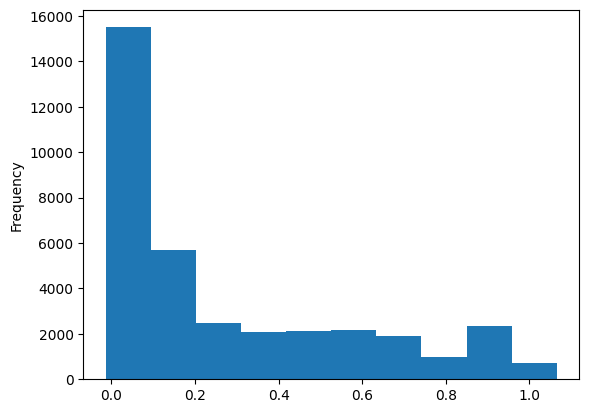

In [35]:
df.acousticness.plot.hist()

In [36]:
len(df[(df['acousticness'] < 0.75) & (df['acousticness'] < 0.2)]['acousticness'])

21123

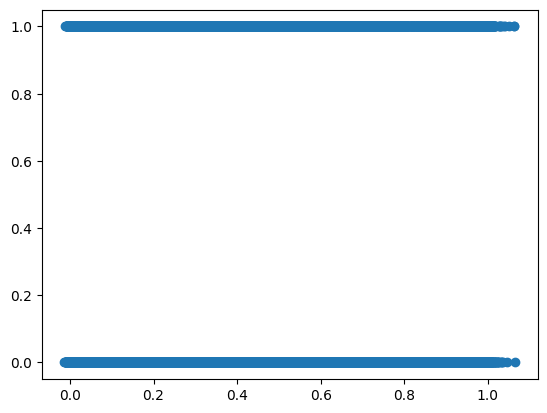

In [37]:
limit=30000
plt.scatter(x=df['acousticness'][:limit],
            y=df['song_popularity'][:limit])

In [38]:
len(df)

40000

In [39]:
15150/40000

0.37875

**conclusions🧠**: 
1. from 0 to 0.1 we have the number in 15150 acousticness which is 37% of the entire dataset
2. From 0.2(acousticness) to 0.75(acousticness) we have the 21123 labels which is the 52 % of the entire dataset
> Note: It means if you select any value well ay random row , acousticness to fall under 0 to 0.1 is 37% and from 0.2 to 0.75 is  52%

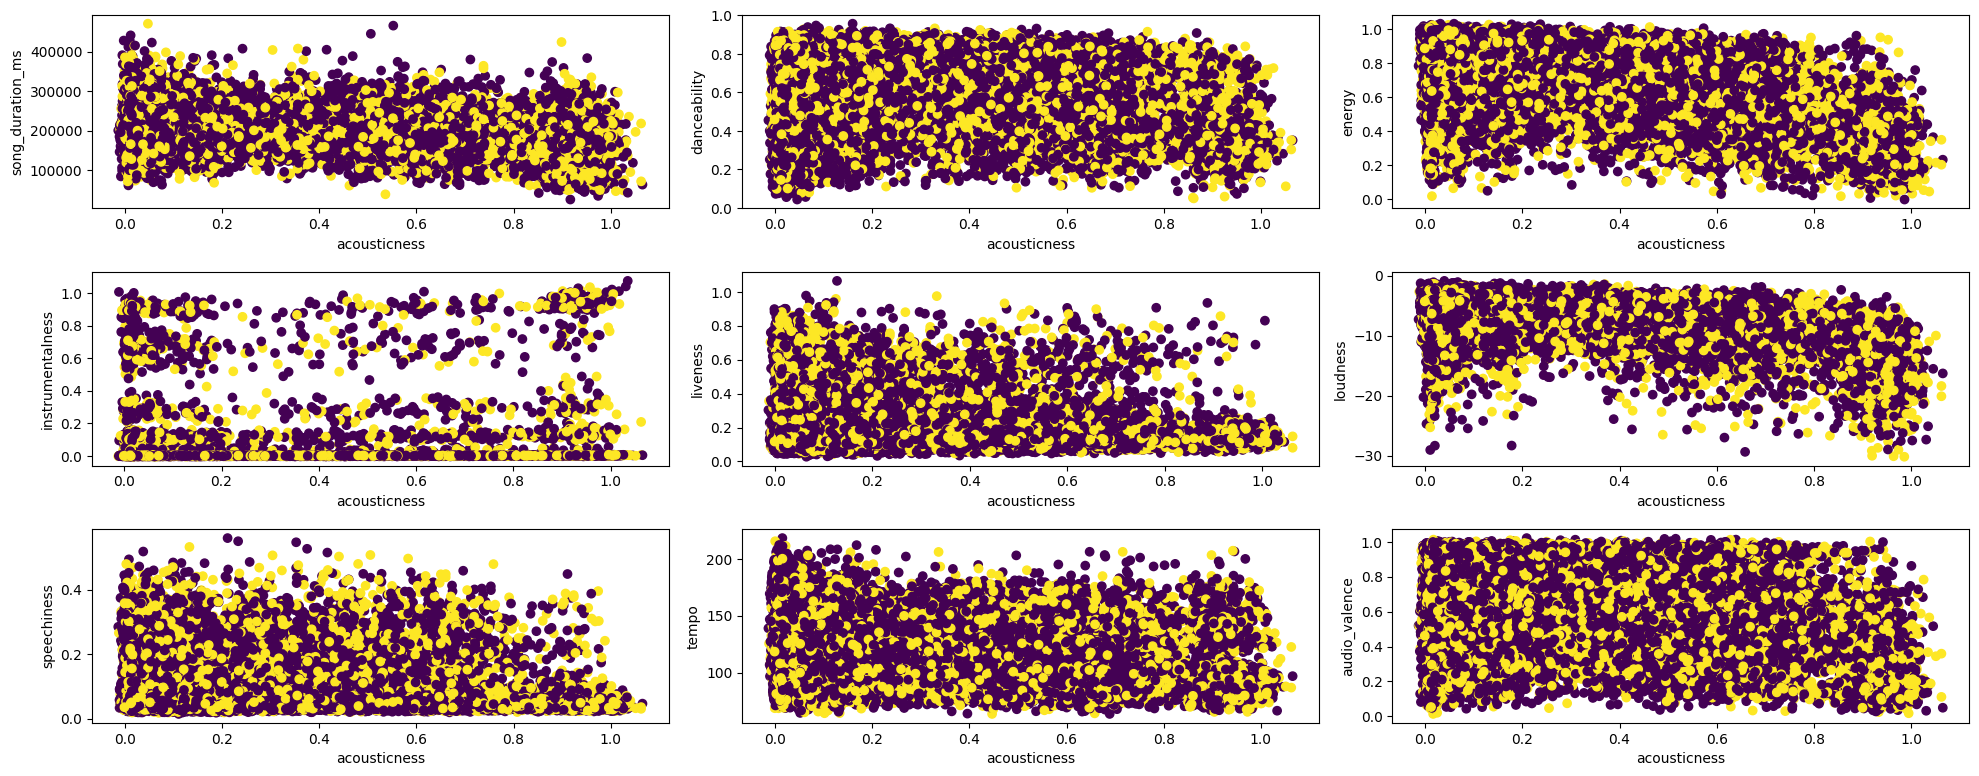

In [40]:
get_relational_scatterplot(non_catgorical_features=non_catgorical_features,
                          x_feature="acousticness", limit=30000)

In [41]:
columns

Index(['song_duration_ms', 'acousticness', 'danceability', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'audio_mode',
       'speechiness', 'tempo', 'time_signature', 'audio_valence',
       'song_popularity'],
      dtype='object')

### danceability

In [42]:
df.danceability

0        0.856520
1        0.733289
2        0.188387
3        0.585234
4             NaN
           ...   
39995    0.748942
39996    0.672830
39997    0.409065
39998    0.365738
39999    0.354585
Name: danceability, Length: 40000, dtype: float64

In [43]:
df.danceability.describe()

count    35974.000000
mean         0.570951
std          0.190010
min          0.043961
25%          0.424760
50%          0.608234
75%          0.718464
max          0.957131
Name: danceability, dtype: float64

In [44]:
range(0, len(df.danceability.dropna()))

range(0, 35974)

In [45]:
df.danceability.dropna()

0        0.856520
1        0.733289
2        0.188387
3        0.585234
5        0.825919
           ...   
39995    0.748942
39996    0.672830
39997    0.409065
39998    0.365738
39999    0.354585
Name: danceability, Length: 35974, dtype: float64

[]

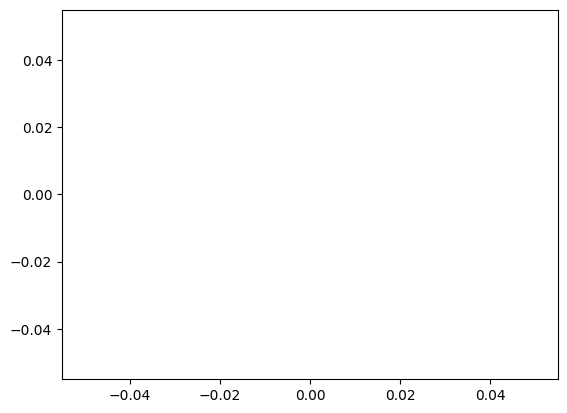

In [46]:
plt.plot()

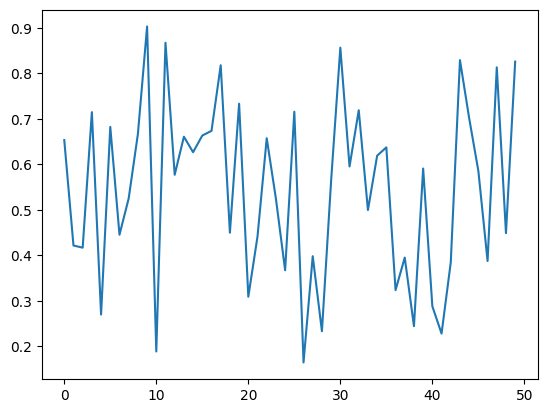

In [47]:
count_of_points = 50
plt.plot(np.arange(0, len(df['danceability'].dropna()[:count_of_points])),
         df['danceability'].dropna()[:count_of_points].sample(frac=1) )

<Axes: >

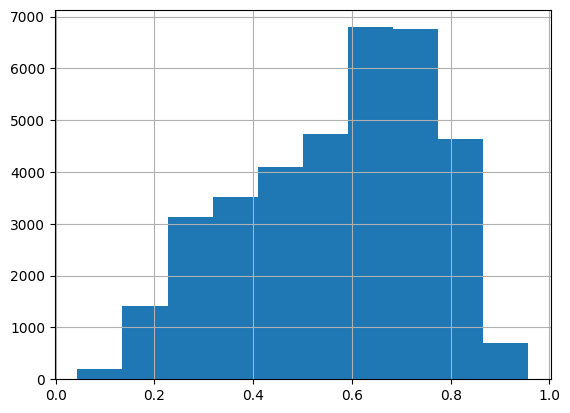

In [48]:
df.danceability.hist()

In [49]:
df['danceability']

0        0.856520
1        0.733289
2        0.188387
3        0.585234
4             NaN
           ...   
39995    0.748942
39996    0.672830
39997    0.409065
39998    0.365738
39999    0.354585
Name: danceability, Length: 40000, dtype: float64

In [50]:
columns

Index(['song_duration_ms', 'acousticness', 'danceability', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'audio_mode',
       'speechiness', 'tempo', 'time_signature', 'audio_valence',
       'song_popularity'],
      dtype='object')

In [51]:
df['danceability'][:200].isna().sum()

21

In [52]:
df.audio_mode

0        0
1        1
2        0
3        0
4        0
        ..
39995    0
39996    0
39997    0
39998    1
39999    0
Name: audio_mode, Length: 40000, dtype: int64

In [53]:
non_catgorical_features

Index(['song_duration_ms', 'acousticness', 'danceability', 'energy',
       'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo',
       'audio_valence'],
      dtype='object')

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   song_duration_ms  35899 non-null  float64
 1   acousticness      36008 non-null  float64
 2   danceability      35974 non-null  float64
 3   energy            36025 non-null  float64
 4   instrumentalness  36015 non-null  float64
 5   key               35935 non-null  float64
 6   liveness          35914 non-null  float64
 7   loudness          36043 non-null  float64
 8   audio_mode        40000 non-null  int64  
 9   speechiness       40000 non-null  float64
 10  tempo             40000 non-null  float64
 11  time_signature    40000 non-null  int64  
 12  audio_valence     40000 non-null  float64
 13  song_popularity   40000 non-null  int64  
dtypes: float64(11), int64(3)
memory usage: 4.3 MB


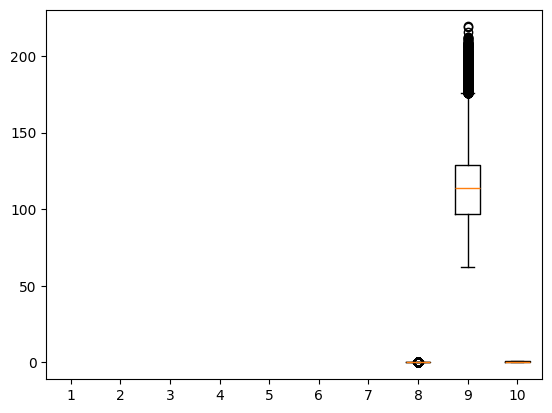

In [55]:
# fig = plt.figure(figsize =(10, 8))
plt.boxplot(df[non_catgorical_features]);

In [56]:
df.tempo

0        158.386236
1        102.752988
2        178.685791
3        128.715630
4        121.928157
            ...    
39995    168.262924
39996    110.684544
39997     99.556074
39998    139.857384
39999    101.974949
Name: tempo, Length: 40000, dtype: float64

In [57]:
df[df['tempo']>178]['tempo']

2        178.685791
55       183.201196
127      191.987391
137      186.245355
139      181.587338
            ...    
39818    178.401892
39862    196.360410
39876    199.267860
39908    184.589095
39917    196.801431
Name: tempo, Length: 906, dtype: float64

<Axes: ylabel='danceability'>

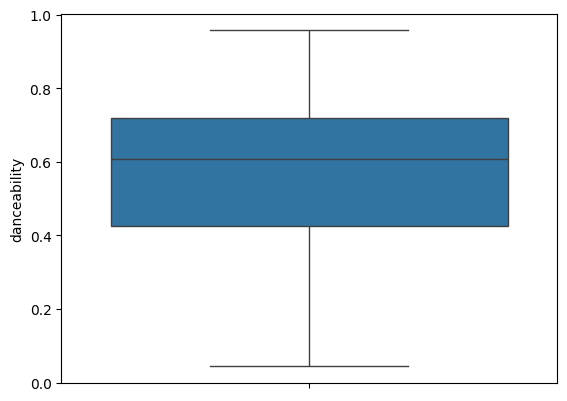

In [58]:
sns.boxplot(df['danceability'])

<Axes: ylabel='danceability'>

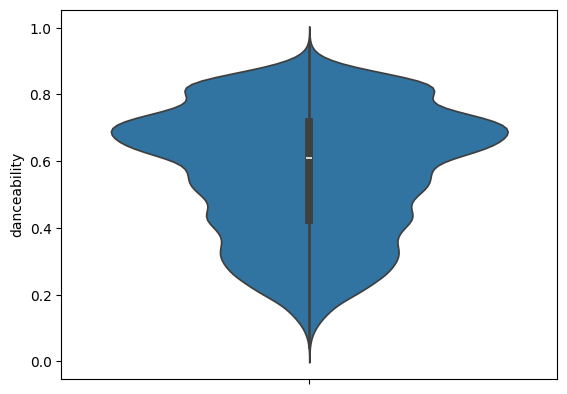

In [59]:
import seaborn as sns

sns.violinplot(df['danceability'])

<Figure size 640x480 with 0 Axes>

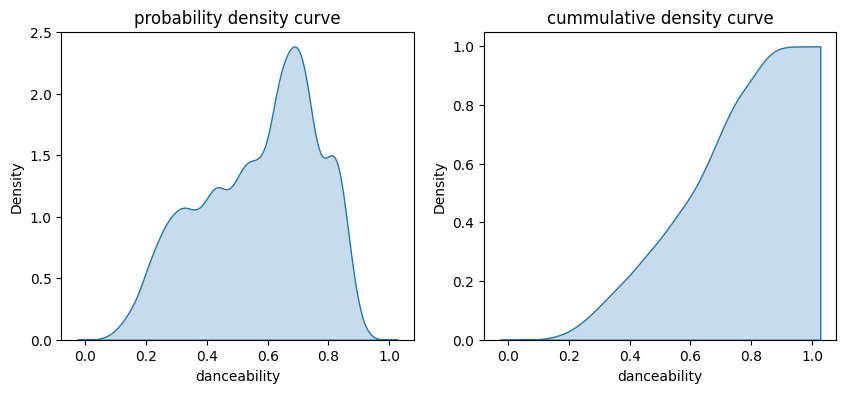

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.subplots_adjust(wspace=0.5)
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
sns.kdeplot(data=df['danceability'].dropna(), fill=True)
plt.title('probability density curve')
plt.subplot(1, 2,2)
sns.kdeplot(data=df['danceability'].dropna(), fill=True, cumulative=True)
plt.title('cummulative density curve')
plt.show()



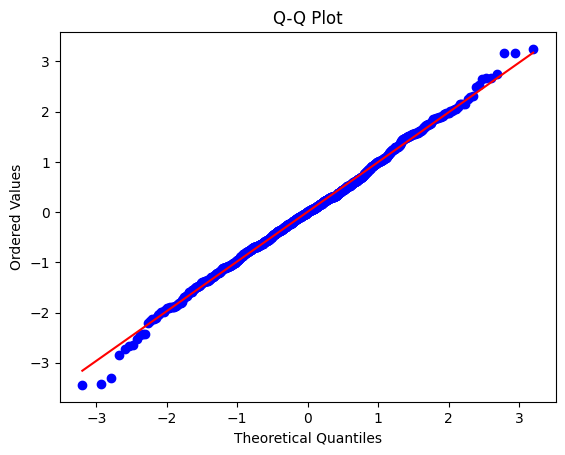

In [61]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

# Generate some sample data (replace this with your data)
data = np.random.normal(loc=0, scale=1, size=1000)

# Create a Q-Q plot using scipy.stats.probplot
stats.probplot(data, dist="norm", plot=plt)

# Add labels and title
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Ordered Values')
plt.title('Q-Q Plot')

# Show the plot
plt.show()

conclusions🧠:
1. look 

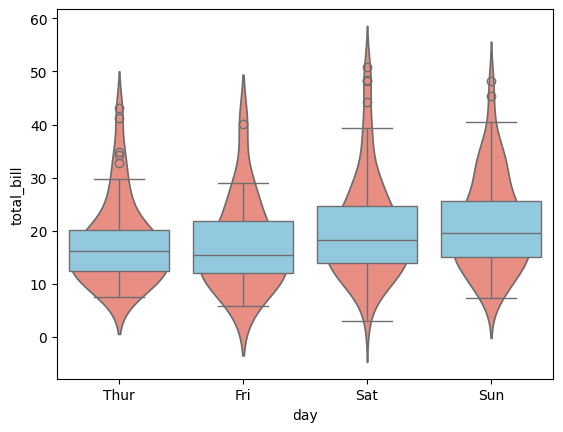

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt

# Generate some sample data
data = sns.load_dataset("tips")

# Create a box plot
sns.boxplot(x="day", y="total_bill", data=data, color="skyblue")

# Overlay a violin plot
sns.violinplot(x="day", y="total_bill", data=data, inner=None, color="salmon")

# Show the plot
plt.show()

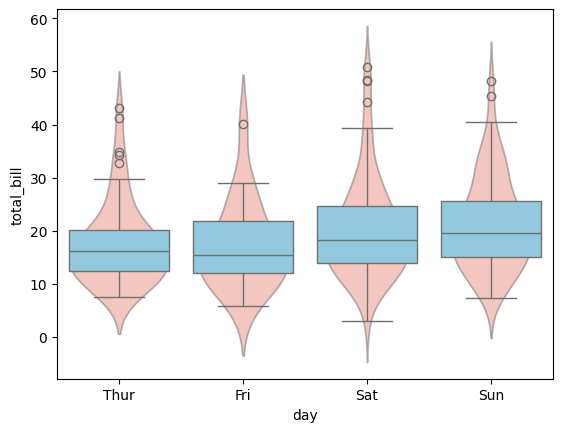

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt

# Generate some sample data
data = sns.load_dataset("tips")

# Create a box plot with transparency
sns.boxplot(x="day", y="total_bill", data=data, color="skyblue")

# Overlay a violin plot with transparency
sns.violinplot(x="day", y="total_bill", data=data, inner=None, color="salmon", alpha=0.5)

# Make the box plot transparent
for artist in plt.gca().artists:
    artist.set_alpha(0.5)

# Show the plot
plt.show()
